In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy  as np 
import seaborn as sns

In [ ]:
data = pd.read_excel(r"C:\Users\SOFT LAPTOP\Downloads\Blinkit_Data.xlsx")

In [ ]:
# exploring data
print(data.head())
print(data.tail())
print(data.columns)
print(data.shape)

In [ ]:
#data cleaning 
data["Item Fat Content"]= data["Item Fat Content"].replace({
                                                           "LF":"Low Fat",
                                                           "reg" :"Regular",
                                                           "low fat" :"Low Fat",
                                                           "regular":"Regular"
                                                       },inplace=True)

                 #MAKING SURE OUR CODE IS RUNNING 

print(data["Item Fat Content"].unique())


['Regular' 'Low Fat']


In [ ]:
 ## GETTING KPIs FROM DATA ##
        # TOTAL SALES

total_sales= data["Sales"].sum()    

        #  AVERAGE SALES

avg_sales=data["Sales"].mean()

        #NUMBER OF ITEMS

total_items = data["Sales"].count()

        #AVERAGE RATING

avg_rating = data["Rating"].mean()

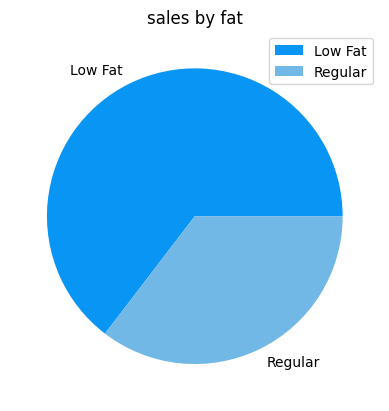

In [ ]:
  #TOTAL SALES BY FAT CONTENT

sales_by_fat = data.groupby("Item Fat Content")["Sales"].sum()

        #PIE CHART TO SHOWING SALES BY FAT
plt.pie(sales_by_fat,labels=sales_by_fat.index,colors=["#0895F3","#72B8E6"])
plt.legend()
plt.title("sales by fat")
plt.show()


In [ ]:
 #TATOL SALES BY ITEM TYPE
         
sales_by_item = data.groupby("Item Type")["Sales"].sum().sort_values(ascending=True)

#bar chart for sales by item type 
plt.bar(sales_by_item.index,sales_by_item.values,color="#1379CD")

for i, value in enumerate(sales_by_item.values):
    plt.text(i, value + 0.3,f"{value:.0f}" , ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.title("Sales By Item")
plt.xticks(rotation=-90)

plt.show()


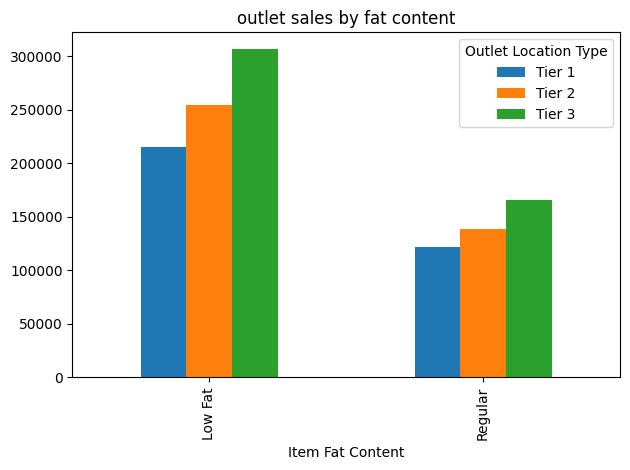

In [ ]:
 #TOTAL SALES FOR EACH OUTLET BASED ON FAT CONTENT

grouped = data.groupby(['Item Fat Content','Outlet Location Type'])['Sales'].sum().unstack()
ex =grouped.plot(kind='bar')
plt.title("outlet sales by fat content")
plt.tight_layout()
plt.show()

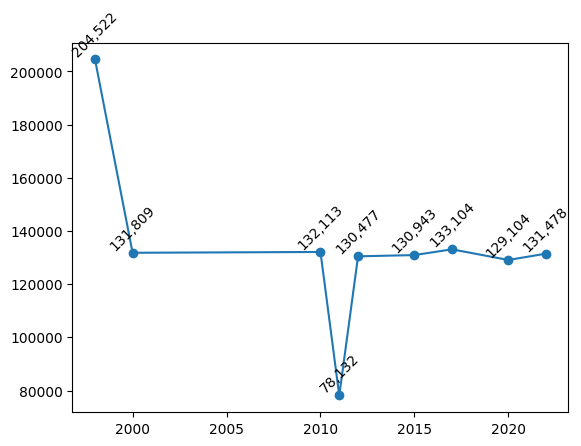

In [ ]:
 #TOTAL SALES BY YEAR ESTABLISHING
year_sales = data.groupby("Outlet Establishment Year")["Sales"].sum().sort_index() 
plt.plot(year_sales.index, year_sales.values,marker="o")

for x,y in zip(year_sales.index,year_sales.values) :
    plt.text(x,y,f"{y:,.0f}",ha="center",va="bottom",rotation=45)

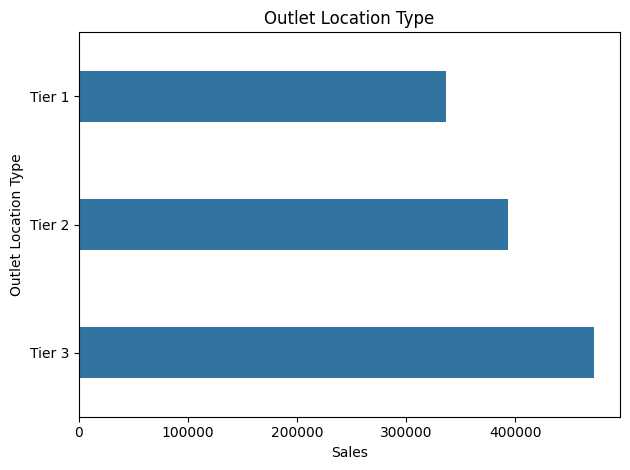

In [ ]:
# SALES BY LOCATION TYPE 
location_sales = data.groupby("Outlet Location Type")['Sales'].sum().reset_index()
sns.barplot(x="Sales" ,y="Outlet Location Type",data=location_sales,width=.4)
plt.title("Outlet Location Type")
plt.tight_layout() 
